# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS-109A Introduction to Data Science

## Lab 10:  Neural Networks using `keras` 

**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors:** Pavlos Protopapas and Kevin Rader<br/>
**Lab Instructor:** Eleni Kaxiras<br/>
**Authors:** David Sondak, Eleni Kaxiras, and Pavlos Protopapas

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get\
    ("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

## Anatomy of an Artificial Neural Network

In a previous lab we created our own neural network by writing some simple python functions.  We focused on a regression problem where we tried to learn a function. We practiced using the logistic activation function in a network with multiple nodes, but a single or two hidden layers.  Some of the key observations were:
* Increasing the number of nodes allows us to represent more complicated functions  
* The weights and biases have a very big impact on the solution
* Finding the "correct" weights and biases is really hard to do manually
* There must be a better method for determining the weights and biases automatically

We also didn't assess the effects of different activation functions or different network depths. 

### The 3 parts of an ANN

- **Part 1: the input layer** (dimentions are determined from our dataset)
- **Part 2: the internal architecture or hidden layers** (the number of layers, the activation functions, the learnable parameters and other hyperparameters)
- **Part 3: the output layer** (what we want from the network)

### A word about .npy files

Numpy arrays are faster than plain python lists, as we know. Numpy also offers a file format called .npy, which, when it comes to reading the same data multiple times from disk storage, is a lot faster than reading from a csv file. You can save any list or array into this format.

In [3]:
np.save('/tmp/123', np.array([[1, 2, 3], [4, 5, 6]]))
hello = np.load('/tmp/123.npy')

In [4]:
hello

array([[1, 2, 3],
       [4, 5, 6]])

## `Keras` Basics ![](figs/keras.png)
https://keras.io/

Machine learning computations can be quite demanding. TensorFlow is a framework for representing complicated ML algorithms and executing them in any platform, from a phone to a distributed system using GPUs. Developed by Google Brain, TensorFlow is used very broadly today. 

**[`keras`](https://keras.io/)**, is a high-level API used for fast prototyping, advanced research, and production. We will use `tf.keras` which is TensorFlow's implementation of the `keras` API.

### Models are assemblies of layers

The core data structure of Keras is a **model**, a way to organize layers. A model is understood as a sequence or a graph of standalone, fully-configurable modules that can be plugged together with as few restrictions as possible. In particular, neural layers, cost functions, optimizers, initialization schemes, activation functions, regularization schemes are all standalone modules that you can combine to create new models.

The simplest type of model is the **Sequential** model, a linear stack of layers. For more complex architectures, one can use the Keras **Functional** API, which allows to build arbitrary graphs of layers.

https://keras.io/models/model/

Everything you need to know about the Sequential model is here: https://keras.io/models/sequential/

### Keras Installation

If you haven't already, install `Keras` using the instructions found at [https://keras.io/#installation](https://keras.io/#installation)

Choose the TensorFlow installation instructions (found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/) ).

### Example: Approximating a Gaussian using keras
Let's try to redo the problem from last week.  Recall that we had a function

$$
\begin{aligned}
f\left(x\right) = e^{-x^{2}}
\end{aligned}
$$

and we wanted to use a neural network to approximate that function.  This week, we will use `keras` to do the true optimization.

First, we import the necessary `keras` modules.

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

print(tf.VERSION)
print(tf.keras.__version__)

/Users/anthonyrentsch/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0
2.1.6-tf


In [6]:
# Checking if our machine has GPUs. Mine does not..
with tf.Session() as sess:
    devices = sess.list_devices()
    print(devices)

[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 17750007180662884640)]


Before we get started, we need to create some **data**.  We will generate data points from an underlying function (here the Guassian).  Then we will use the `sklearn` `train_test_split` method to split the dataset into training and testing portions.  Remember that we train a machine learning algorithm on the training set and then assess the algorithm's performance on the test set.

In [7]:
from sklearn.model_selection import train_test_split

n_samples = 1050 # set the number of samples to take for each dataset
test_size = 0.3 # set the proportion of data to hold out for testing

# define the function and add noise

def f_gauss(x):
    return np.exp(-x * x) + np.random.normal(loc=0, scale=.1, size = x.shape[0])

X = np.random.permutation(np.linspace(-10, 10, n_samples)) # choose some points from the function
Y = f_gauss(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

Let's plot the data

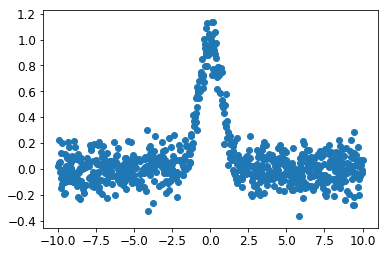

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train)

### Building a keras network

Now we will create a neural network model with keras. We're going to use a single layer and just 2 neurons in that layer. We will start with the sigmoid activation function. We also choose a linear output layer since we are doing regression. The loss function is selected to be the **mean squared error (MSE)**. In addition to these choices we must also specify our initial weights as well as the optimization method that will be used to minimize the loss function. The keras interface has many choises as to those hyperparameters.

**Part 1:** First we start by defining the number of nodes in a layer and the input dimensions. If we have more than one layer we might need to define a value for the number of nodes (H) for each layer.

`H = 
input_dim =`

Then we instantiate the model

`model = models.Sequential() `

**Part 2:** Then we add the hidden layers. Adding layers and stacking them is done using `.add()`

`model.add(layers.Dense(H, input_dim=input_dim,  
                activation='sigmoid')) `

**An alternative way** 

`model = Sequential([
    Dense(200, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(4, activation='linear')
])`

**Part 3:** We end with the final layer (output)

`model.add(layers.Dense(1, 
                activation='linear')) `
                
Our model is not ready yet. We need to configure its learning process with .compile():

`model.compile(loss='mean_squared_error', optimizer='sgd')`

If you need to, you can further configure your optimizer. A core principle of Keras is to make things reasonably simple, while allowing the user to be fully in control when they need to (the ultimate control being the easy extensibility of the source code)

`model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01))`
              
Our model is now ready to use. We haven't trained it yet, but we'll do that now using the fit method. Notice that we also need to specify the batch size for the stochastic gradient decent algorithm as well as the number of epochs to run.

`model.fit(X_train, Y_train, batch_size=100, epochs=100)#, verbose=1)`

<div class="exercise"><b>Exercise 1:</b> </div>

Build a NN with one hidden layer with **2 neurons**. Use the `tanh` activation function. Train the model using the X_train dataset from above (train the model in this case means run `.compile` and `.fit`).

In [10]:
print(X_train.shape)
print(Y_train.shape)


(735,)
(735,)


In [9]:
# %load solutions/NN_1_layer_2_nodes.py
H = 2 # number of nodes in the layer
input_dim = 1 # input dimension: just x

model = models.Sequential() # create sequential multi-layer perceptron

# our first hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                activation='tanh')) 
# layer 1
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=100, verbose=1)


Epoch 1/100
735/735 [==============================] - 0s 407us/step - loss: 0.0755
Epoch 2/100
735/735 [==============================] - 0s 16us/step - loss: 0.0736
Epoch 3/100
735/735 [==============================] - 0s 16us/step - loss: 0.0723
Epoch 4/100
735/735 [==============================] - 0s 16us/step - loss: 0.0713
Epoch 5/100
735/735 [==============================] - 0s 13us/step - loss: 0.0704
Epoch 6/100
735/735 [==============================] - 0s 15us/step - loss: 0.0697
Epoch 7/100
735/735 [==============================] - 0s 17us/step - loss: 0.0691
Epoch 8/100
735/735 [==============================] - 0s 15us/step - loss: 0.0686
Epoch 9/100
735/735 [==============================] - 0s 14us/step - loss: 0.0681
Epoch 10/100
735/735 [==============================] - 0s 15us/step - loss: 0.0678
Epoch 11/100
735/735 [==============================] - 0s 16us/step - loss: 0.0675
Epoch 12/100
735/735 [==============================] - 0s 14us/step - loss: 0.0672


735/735 [==============================] - 0s 12us/step - loss: 0.0142
Epoch 99/100
735/735 [==============================] - 0s 12us/step - loss: 0.0141
Epoch 100/100
735/735 [==============================] - 0s 13us/step - loss: 0.0139


Great!  We've trained a model.  Now it's time to explore the results.  Notice the loss function.

In [12]:
# Some constants for our plots
FIG_SIZE = (10,5)
FONT_SIZE = 10
LABEL_SIZE = 15

In [13]:
# use our model to predict in the range we want
X_range = np.linspace(-10, 10, 1000)
y_pred = model.predict(X_range)

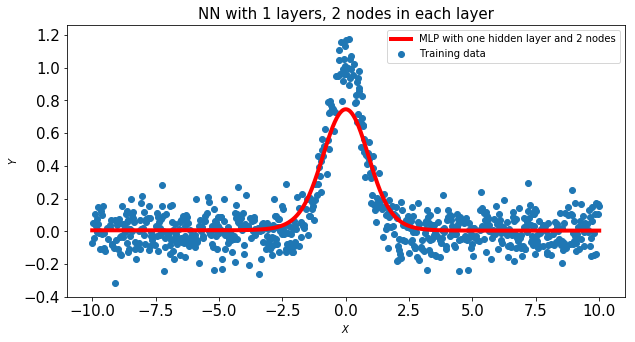

In [14]:
# Plot the results
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'MLP with one hidden layer and {H} nodes')
ax.set_xlabel(r'$X$', fontsize=FONT_SIZE)
ax.set_ylabel(r'$Y$', fontsize=FONT_SIZE)
ax.set_title(f'NN with {len(model_history.model.layers)-1} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=LABEL_SIZE)

ax.legend(loc=0, fontsize=FONT_SIZE)

plt.show()

<div class="exercise"><b>Exercise 2:</b></div>

Change the number of neurons in the layer. Try changing the activation function to `reLU`.  Can you get better results?  What worked the best?

In [ ]:
# your code here


In [16]:
# %load solutions/NN_1_layer_16_nodes.py

H = 40 # number of nodes in the layer
input_dim = 1 # input dimension: just x

model2 = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model2.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='relu')) 
# layer 1
model2.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# compile the model
model2.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model2_history = model2.fit(X_train, Y_train, batch_size=256, epochs=1200, verbose=1, \
                          shuffle = True, validation_split=0.5)


Train on 367 samples, validate on 368 samples
Epoch 1/1200
367/367 [==============================] - 0s 744us/step - loss: 0.0724 - val_loss: 0.0733
Epoch 2/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0700 - val_loss: 0.0709
Epoch 3/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0683 - val_loss: 0.0694
Epoch 4/1200
367/367 [==============================] - 0s 12us/step - loss: 0.0674 - val_loss: 0.0686
Epoch 5/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0668 - val_loss: 0.0682
Epoch 6/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0667 - val_loss: 0.0678
Epoch 7/1200
367/367 [==============================] - 0s 13us/step - loss: 0.0665 - val_loss: 0.0674
Epoch 8/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0661 - val_loss: 0.0669
Epoch 9/1200
367/367 [==============================] - 0s 13us/step - loss: 0.0655 - val_loss: 0.0663
Epoch 10/1200
367/367 [===

367/367 [==============================] - 0s 14us/step - loss: 0.0334 - val_loss: 0.0322
Epoch 158/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0333 - val_loss: 0.0319
Epoch 159/1200
367/367 [==============================] - 0s 13us/step - loss: 0.0333 - val_loss: 0.0319
Epoch 160/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0331 - val_loss: 0.0320
Epoch 161/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0330 - val_loss: 0.0322
Epoch 162/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0331 - val_loss: 0.0320
Epoch 163/1200
367/367 [==============================] - 0s 24us/step - loss: 0.0330 - val_loss: 0.0316
Epoch 164/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0330 - val_loss: 0.0316
Epoch 165/1200
367/367 [==============================] - 0s 13us/step - loss: 0.0328 - val_loss: 0.0319
Epoch 166/1200
367/367 [==============================] - 0s 13us/step

367/367 [==============================] - 0s 15us/step - loss: 0.0268 - val_loss: 0.0256
Epoch 313/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0267 - val_loss: 0.0255
Epoch 314/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0264 - val_loss: 0.0255
Epoch 315/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0263 - val_loss: 0.0255
Epoch 316/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0263 - val_loss: 0.0255
Epoch 317/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0264 - val_loss: 0.0253
Epoch 318/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0263 - val_loss: 0.0254
Epoch 319/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0263 - val_loss: 0.0255
Epoch 320/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0261 - val_loss: 0.0256
Epoch 321/1200
367/367 [==============================] - 0s 15us/step

367/367 [==============================] - 0s 14us/step - loss: 0.0212 - val_loss: 0.0204
Epoch 469/1200
367/367 [==============================] - 0s 13us/step - loss: 0.0211 - val_loss: 0.0203
Epoch 470/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0210 - val_loss: 0.0203
Epoch 471/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0210 - val_loss: 0.0205
Epoch 472/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0210 - val_loss: 0.0205
Epoch 473/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0209 - val_loss: 0.0202
Epoch 474/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0209 - val_loss: 0.0200
Epoch 475/1200
367/367 [==============================] - 0s 12us/step - loss: 0.0208 - val_loss: 0.0202
Epoch 476/1200
367/367 [==============================] - 0s 22us/step - loss: 0.0208 - val_loss: 0.0203
Epoch 477/1200
367/367 [==============================] - 0s 18us/step

367/367 [==============================] - 0s 15us/step - loss: 0.0151 - val_loss: 0.0142
Epoch 625/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0151 - val_loss: 0.0142
Epoch 626/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0151 - val_loss: 0.0142
Epoch 627/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0150 - val_loss: 0.0141
Epoch 628/1200
367/367 [==============================] - 0s 12us/step - loss: 0.0150 - val_loss: 0.0140
Epoch 629/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0150 - val_loss: 0.0141
Epoch 630/1200
367/367 [==============================] - 0s 19us/step - loss: 0.0149 - val_loss: 0.0142
Epoch 631/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0149 - val_loss: 0.0141
Epoch 632/1200
367/367 [==============================] - 0s 13us/step - loss: 0.0149 - val_loss: 0.0140
Epoch 633/1200
367/367 [==============================] - 0s 14us/step

367/367 [==============================] - 0s 13us/step - loss: 0.0121 - val_loss: 0.0115
Epoch 781/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0121 - val_loss: 0.0112
Epoch 782/1200
367/367 [==============================] - 0s 13us/step - loss: 0.0120 - val_loss: 0.0113
Epoch 783/1200
367/367 [==============================] - 0s 13us/step - loss: 0.0120 - val_loss: 0.0115
Epoch 784/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0119 - val_loss: 0.0115
Epoch 785/1200
367/367 [==============================] - 0s 16us/step - loss: 0.0120 - val_loss: 0.0114
Epoch 786/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0120 - val_loss: 0.0112
Epoch 787/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0118 - val_loss: 0.0112
Epoch 788/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0119 - val_loss: 0.0112
Epoch 789/1200
367/367 [==============================] - 0s 12us/step

367/367 [==============================] - 0s 15us/step - loss: 0.0107 - val_loss: 0.0101
Epoch 937/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0107 - val_loss: 0.0103
Epoch 938/1200
367/367 [==============================] - 0s 13us/step - loss: 0.0107 - val_loss: 0.0103
Epoch 939/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0107 - val_loss: 0.0102
Epoch 940/1200
367/367 [==============================] - 0s 18us/step - loss: 0.0106 - val_loss: 0.0102
Epoch 941/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0107 - val_loss: 0.0101
Epoch 942/1200
367/367 [==============================] - 0s 12us/step - loss: 0.0107 - val_loss: 0.0102
Epoch 943/1200
367/367 [==============================] - 0s 12us/step - loss: 0.0106 - val_loss: 0.0101
Epoch 944/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0106 - val_loss: 0.0101
Epoch 945/1200
367/367 [==============================] - 0s 14us/step

367/367 [==============================] - 0s 13us/step - loss: 0.0103 - val_loss: 0.0099
Epoch 1015/1200
367/367 [==============================] - 0s 15us/step - loss: 0.0103 - val_loss: 0.0099
Epoch 1016/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0104 - val_loss: 0.0099
Epoch 1017/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0103 - val_loss: 0.0101
Epoch 1018/1200
367/367 [==============================] - 0s 12us/step - loss: 0.0104 - val_loss: 0.0101
Epoch 1019/1200
367/367 [==============================] - 0s 12us/step - loss: 0.0104 - val_loss: 0.0099
Epoch 1020/1200
367/367 [==============================] - 0s 17us/step - loss: 0.0103 - val_loss: 0.0100
Epoch 1021/1200
367/367 [==============================] - 0s 11us/step - loss: 0.0104 - val_loss: 0.0099
Epoch 1022/1200
367/367 [==============================] - 0s 12us/step - loss: 0.0103 - val_loss: 0.0099
Epoch 1023/1200
367/367 [==============================] - 0s 

367/367 [==============================] - 0s 18us/step - loss: 0.0100 - val_loss: 0.0100
Epoch 1169/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0100 - val_loss: 0.0096
Epoch 1170/1200
367/367 [==============================] - 0s 13us/step - loss: 0.0100 - val_loss: 0.0096
Epoch 1171/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0100 - val_loss: 0.0098
Epoch 1172/1200
367/367 [==============================] - 0s 12us/step - loss: 0.0100 - val_loss: 0.0098
Epoch 1173/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0099 - val_loss: 0.0099
Epoch 1174/1200
367/367 [==============================] - 0s 14us/step - loss: 0.0101 - val_loss: 0.0096
Epoch 1175/1200
367/367 [==============================] - 0s 12us/step - loss: 0.0098 - val_loss: 0.0099
Epoch 1176/1200
367/367 [==============================] - 0s 13us/step - loss: 0.0100 - val_loss: 0.0097
Epoch 1177/1200
367/367 [==============================] - 0s 

Is the loss smaller now? You may access the results in a model by its `.history`

In [17]:
model2_history.history['loss'][-1]

0.010173060634358702

Again let's use the new model to predict:

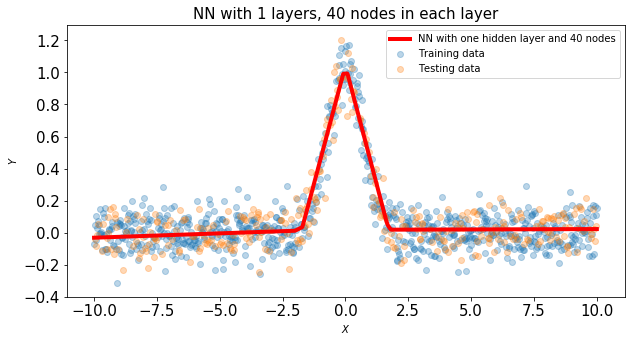

In [18]:
# use our model to predict in the range we want
X_range = np.linspace(-10, 10, 1000)
y_pred = model2.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.scatter(X_train, Y_train, label='Training data', alpha=0.3)
ax.scatter(X_test, Y_test, label='Testing data' , alpha=0.3)
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN with one hidden layer and {H} nodes')
ax.set_xlabel(r'$X$', fontsize=FONT_SIZE)
ax.set_ylabel(r'$Y$', fontsize=FONT_SIZE)
ax.set_title(f'NN with {len(model2_history.model.layers)-1} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=LABEL_SIZE)

ax.legend(loc=0, fontsize=FONT_SIZE)

plt.show()

<div class="exercise"><b>Exercise 3:</b>
</div>

Plot the loss function as a function of the epochs. <b>Hint:</b> You can access the loss function values with the command:`model_history.history['loss']`



In [ ]:
# your code here


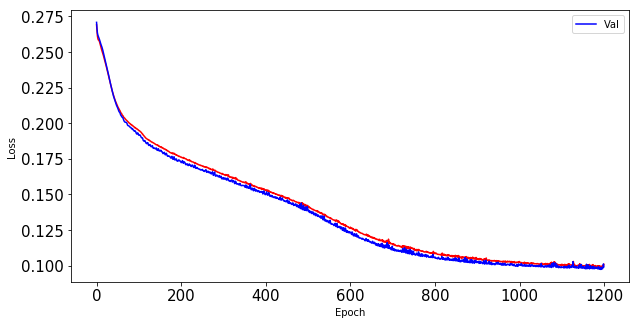

In [20]:
# %load solutions/print_history.py
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.plot(np.sqrt(model2_history.history['loss']), 'r')
ax.plot(np.sqrt(model2_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=FONT_SIZE)
ax.set_ylabel(r'Loss', fontsize=FONT_SIZE)
ax.legend()
ax.tick_params(labelsize=LABEL_SIZE)


How good is the model?  We can compute the $R^{2}$ score to get a sense of the model performance.

In [21]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
from sklearn.metrics import r2_score as r2

train_score = model.evaluate(X_train, Y_train, verbose=1)
print('Train loss:', train_score)
print('Train R2:', r2(Y_train, model.predict(X_train)))

test_score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', test_score)
print('Test R2:', r2(Y_test, model.predict(X_test)))

735/735 [==============================] - 0s 89us/step
Train loss: 0.01280058433434793
Train R2: 0.7962087586016647
315/315 [==============================] - 0s 14us/step
Test loss: 0.012998960941793427
Test R2: 0.8139257903564647


<div class="exercise"><b>Exercise 4</b> </div>

Let's add more layers. Fix the width $H$ and fit a MLP network with <b>multiple</b> hidden layers, each with the same width. Start with logistic or hyperbolic-tan activation functions for the hidden nodes and linear activation for the output. Experiment with the number of layers and observe the effect of this on the quality of the fit.

In [ ]:
# your code here


In [23]:
# %load solutions/NN_10_layers_100_nodes.py

# number of hidden nodes
H =  100
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model3 = models.Sequential()
# layer 0
model3.add(layers.Dense(H, input_dim=input_dim,  
                activation='tanh')) 
# layer 1
model3.add(layers.Dense(H,
                activation='tanh')) 
# layer 2
model3.add(layers.Dense(H,
                activation='tanh')) 
# layer 3
model3.add(layers.Dense(H,  
                activation='tanh')) 
# layer 4
model3.add(layers.Dense(H,  
                activation='tanh')) 
# layer 5
model3.add(layers.Dense(H,  
                activation='tanh')) 
# layer 6
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 7
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 8
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 9
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 10 - output
model3.add(layers.Dense(1, 
                activation='linear')) 


In [24]:
# configure the model
model3.compile(loss='mean_squared_error', optimizer='adam')

In [25]:
# fit the model - INTENSIVE
model3_history = model3.fit(X_train, Y_train, batch_size=256, epochs=1500, verbose=1, \
                            shuffle = True, validation_split=0.3)

Train on 514 samples, validate on 221 samples
Epoch 1/1500
514/514 [==============================] - 1s 2ms/step - loss: 0.6460 - val_loss: 0.3824
Epoch 2/1500
514/514 [==============================] - 0s 35us/step - loss: 0.4525 - val_loss: 0.0822
Epoch 3/1500
514/514 [==============================] - 0s 36us/step - loss: 0.1446 - val_loss: 0.1621
Epoch 4/1500
514/514 [==============================] - 0s 34us/step - loss: 0.1048 - val_loss: 0.1201
Epoch 5/1500
514/514 [==============================] - 0s 38us/step - loss: 0.1155 - val_loss: 0.0651
Epoch 6/1500
514/514 [==============================] - 0s 36us/step - loss: 0.0664 - val_loss: 0.1147
Epoch 7/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0970 - val_loss: 0.0670
Epoch 8/1500
514/514 [==============================] - 0s 36us/step - loss: 0.0572 - val_loss: 0.0734
Epoch 9/1500
514/514 [==============================] - 0s 38us/step - loss: 0.0648 - val_loss: 0.0620
Epoch 10/1500
514/514 [=====

514/514 [==============================] - 0s 33us/step - loss: 0.0097 - val_loss: 0.0141
Epoch 158/1500
514/514 [==============================] - 0s 36us/step - loss: 0.0131 - val_loss: 0.0156
Epoch 159/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0132 - val_loss: 0.0125
Epoch 160/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0131 - val_loss: 0.0152
Epoch 161/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0132 - val_loss: 0.0176
Epoch 162/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0162 - val_loss: 0.0126
Epoch 163/1500
514/514 [==============================] - 0s 40us/step - loss: 0.0105 - val_loss: 0.0102
Epoch 164/1500
514/514 [==============================] - 0s 38us/step - loss: 0.0099 - val_loss: 0.0138
Epoch 165/1500
514/514 [==============================] - 0s 36us/step - loss: 0.0130 - val_loss: 0.0109
Epoch 166/1500
514/514 [==============================] - 0s 37us/step

514/514 [==============================] - 0s 35us/step - loss: 0.0133 - val_loss: 0.0219
Epoch 314/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0187 - val_loss: 0.0109
Epoch 315/1500
514/514 [==============================] - 0s 34us/step - loss: 0.0098 - val_loss: 0.0216
Epoch 316/1500
514/514 [==============================] - 0s 34us/step - loss: 0.0211 - val_loss: 0.0211
Epoch 317/1500
514/514 [==============================] - 0s 36us/step - loss: 0.0166 - val_loss: 0.0153
Epoch 318/1500
514/514 [==============================] - 0s 33us/step - loss: 0.0156 - val_loss: 0.0133
Epoch 319/1500
514/514 [==============================] - 0s 34us/step - loss: 0.0120 - val_loss: 0.0134
Epoch 320/1500
514/514 [==============================] - 0s 33us/step - loss: 0.0128 - val_loss: 0.0135
Epoch 321/1500
514/514 [==============================] - 0s 33us/step - loss: 0.0147 - val_loss: 0.0122
Epoch 322/1500
514/514 [==============================] - 0s 33us/step

514/514 [==============================] - 0s 37us/step - loss: 0.0183 - val_loss: 0.0201
Epoch 470/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0157 - val_loss: 0.0121
Epoch 471/1500
514/514 [==============================] - 0s 33us/step - loss: 0.0119 - val_loss: 0.0252
Epoch 472/1500
514/514 [==============================] - 0s 38us/step - loss: 0.0225 - val_loss: 0.0231
Epoch 473/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0219 - val_loss: 0.0314
Epoch 474/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0257 - val_loss: 0.0373
Epoch 475/1500
514/514 [==============================] - 0s 36us/step - loss: 0.0309 - val_loss: 0.0383
Epoch 476/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0302 - val_loss: 0.0296
Epoch 477/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0229 - val_loss: 0.0207
Epoch 478/1500
514/514 [==============================] - 0s 37us/step

514/514 [==============================] - 0s 37us/step - loss: 0.0134 - val_loss: 0.0126
Epoch 626/1500
514/514 [==============================] - 0s 38us/step - loss: 0.0103 - val_loss: 0.0130
Epoch 627/1500
514/514 [==============================] - 0s 36us/step - loss: 0.0161 - val_loss: 0.0336
Epoch 628/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0248 - val_loss: 0.0232
Epoch 629/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0187 - val_loss: 0.0118
Epoch 630/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0110 - val_loss: 0.0179
Epoch 631/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0170 - val_loss: 0.0230
Epoch 632/1500
514/514 [==============================] - 0s 38us/step - loss: 0.0205 - val_loss: 0.0259
Epoch 633/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0208 - val_loss: 0.0199
Epoch 634/1500
514/514 [==============================] - 0s 39us/step

514/514 [==============================] - 0s 34us/step - loss: 0.0091 - val_loss: 0.0106
Epoch 782/1500
514/514 [==============================] - 0s 40us/step - loss: 0.0099 - val_loss: 0.0111
Epoch 783/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0100 - val_loss: 0.0127
Epoch 784/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0108 - val_loss: 0.0114
Epoch 785/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0093 - val_loss: 0.0102
Epoch 786/1500
514/514 [==============================] - 0s 36us/step - loss: 0.0096 - val_loss: 0.0121
Epoch 787/1500
514/514 [==============================] - 0s 38us/step - loss: 0.0117 - val_loss: 0.0128
Epoch 788/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0115 - val_loss: 0.0151
Epoch 789/1500
514/514 [==============================] - 0s 34us/step - loss: 0.0133 - val_loss: 0.0149
Epoch 790/1500
514/514 [==============================] - 0s 33us/step

514/514 [==============================] - 0s 33us/step - loss: 0.0090 - val_loss: 0.0141
Epoch 938/1500
514/514 [==============================] - 0s 44us/step - loss: 0.0163 - val_loss: 0.0142
Epoch 939/1500
514/514 [==============================] - 0s 41us/step - loss: 0.0119 - val_loss: 0.0160
Epoch 940/1500
514/514 [==============================] - 0s 38us/step - loss: 0.0139 - val_loss: 0.0108
Epoch 941/1500
514/514 [==============================] - 0s 32us/step - loss: 0.0109 - val_loss: 0.0173
Epoch 942/1500
514/514 [==============================] - 0s 48us/step - loss: 0.0147 - val_loss: 0.0132
Epoch 943/1500
514/514 [==============================] - 0s 42us/step - loss: 0.0124 - val_loss: 0.0104
Epoch 944/1500
514/514 [==============================] - 0s 45us/step - loss: 0.0107 - val_loss: 0.0176
Epoch 945/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0184 - val_loss: 0.0197
Epoch 946/1500
514/514 [==============================] - 0s 42us/step

514/514 [==============================] - 0s 36us/step - loss: 0.0141 - val_loss: 0.0109
Epoch 1016/1500
514/514 [==============================] - 0s 36us/step - loss: 0.0108 - val_loss: 0.0115
Epoch 1017/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0103 - val_loss: 0.0153
Epoch 1018/1500
514/514 [==============================] - 0s 38us/step - loss: 0.0149 - val_loss: 0.0140
Epoch 1019/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0108 - val_loss: 0.0109
Epoch 1020/1500
514/514 [==============================] - 0s 36us/step - loss: 0.0098 - val_loss: 0.0112
Epoch 1021/1500
514/514 [==============================] - 0s 36us/step - loss: 0.0093 - val_loss: 0.0113
Epoch 1022/1500
514/514 [==============================] - 0s 33us/step - loss: 0.0092 - val_loss: 0.0117
Epoch 1023/1500
514/514 [==============================] - 0s 34us/step - loss: 0.0092 - val_loss: 0.0116
Epoch 1024/1500
514/514 [==============================] - 0s 

514/514 [==============================] - 0s 49us/step - loss: 0.0100 - val_loss: 0.0101
Epoch 1170/1500
514/514 [==============================] - 0s 42us/step - loss: 0.0103 - val_loss: 0.0134
Epoch 1171/1500
514/514 [==============================] - 0s 40us/step - loss: 0.0135 - val_loss: 0.0105
Epoch 1172/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0092 - val_loss: 0.0122
Epoch 1173/1500
514/514 [==============================] - 0s 38us/step - loss: 0.0104 - val_loss: 0.0119
Epoch 1174/1500
514/514 [==============================] - 0s 41us/step - loss: 0.0093 - val_loss: 0.0115
Epoch 1175/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0112 - val_loss: 0.0119
Epoch 1176/1500
514/514 [==============================] - 0s 39us/step - loss: 0.0105 - val_loss: 0.0121
Epoch 1177/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0102 - val_loss: 0.0151
Epoch 1178/1500
514/514 [==============================] - 0s 

514/514 [==============================] - 0s 38us/step - loss: 0.0145 - val_loss: 0.0172
Epoch 1324/1500
514/514 [==============================] - 0s 41us/step - loss: 0.0149 - val_loss: 0.0105
Epoch 1325/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0101 - val_loss: 0.0114
Epoch 1326/1500
514/514 [==============================] - 0s 36us/step - loss: 0.0110 - val_loss: 0.0120
Epoch 1327/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0116 - val_loss: 0.0144
Epoch 1328/1500
514/514 [==============================] - 0s 37us/step - loss: 0.0119 - val_loss: 0.0102
Epoch 1329/1500
514/514 [==============================] - 0s 36us/step - loss: 0.0091 - val_loss: 0.0102
Epoch 1330/1500
514/514 [==============================] - 0s 38us/step - loss: 0.0097 - val_loss: 0.0104
Epoch 1331/1500
514/514 [==============================] - 0s 47us/step - loss: 0.0095 - val_loss: 0.0104
Epoch 1332/1500
514/514 [==============================] - 0s 

514/514 [==============================] - 0s 32us/step - loss: 0.0098 - val_loss: 0.0115
Epoch 1478/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0105 - val_loss: 0.0106
Epoch 1479/1500
514/514 [==============================] - 0s 33us/step - loss: 0.0093 - val_loss: 0.0109
Epoch 1480/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0092 - val_loss: 0.0122
Epoch 1481/1500
514/514 [==============================] - 0s 34us/step - loss: 0.0099 - val_loss: 0.0120
Epoch 1482/1500
514/514 [==============================] - 0s 33us/step - loss: 0.0097 - val_loss: 0.0105
Epoch 1483/1500
514/514 [==============================] - 0s 32us/step - loss: 0.0091 - val_loss: 0.0103
Epoch 1484/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0096 - val_loss: 0.0101
Epoch 1485/1500
514/514 [==============================] - 0s 35us/step - loss: 0.0090 - val_loss: 0.0104
Epoch 1486/1500
514/514 [==============================] - 0s 

In [26]:
len(model3_history.model.layers)

11

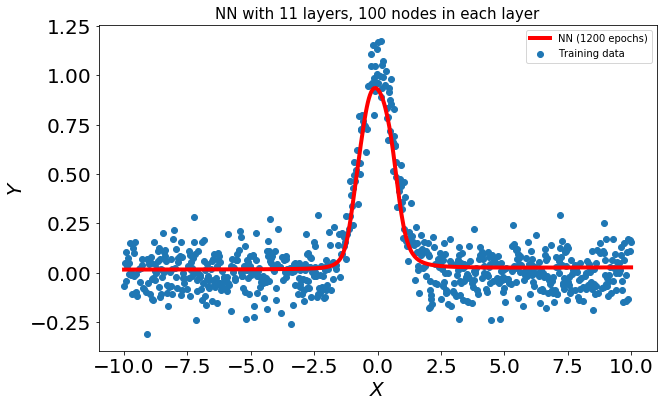

In [27]:
# use our model to predict in the range we want
num_epochs = f'{len(model2_history.epoch)}'

X_range = np.linspace(-10, 10, 500)
y_pred = model3.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN ({num_epochs} epochs)')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title(f'NN with {len(model3_history.model.layers)} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=20)

ax.legend(loc=0)
plt.show()

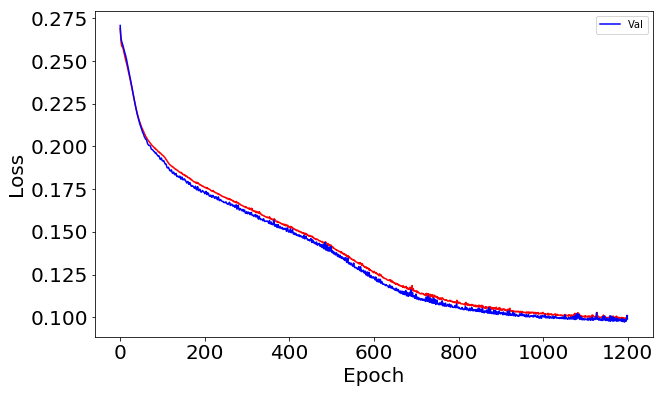

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model2_history.history['loss']), 'r')
ax.plot(np.sqrt(model2_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [29]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
score = model2.evaluate(X_train, Y_train, verbose=1)
print('Train loss:', score)
print('Train R2:', r2(Y_train, model2.predict(X_train)))

735/735 [==============================] - 0s 16us/step
Train loss: 0.009923163185618361
Train R2: 0.8420186356142071


In [30]:
score = model2.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score)
print('Test R2:', r2(Y_test, model2.predict(X_test)))

315/315 [==============================] - 0s 20us/step
Test loss: 0.009525498064855734
Test R2: 0.8636468308008092


We got a better score this time.

### Overfitting the model



<div class="exercise"><b>Exercise 5</b> </div>

Usually we want to avoid overfitting of the data to our model. But here we want to achive overfitting! So we can regularize! There are a few reasons why a model overfits. One is the lack of data. So we will try to overfit by reducing the data. Try that with model3 and see if it overfits.

In [31]:
# Having very few points in our data
from sklearn.model_selection import train_test_split

In [32]:
n_samples = 50 # set the number of samples to take for each dataset
test_size = 0.3 # set the proportion of data to hold out for testing

# define the function and add noise

def f_gauss(x):
    return np.exp(-x * x) + np.random.normal(loc=0, scale=.1, size = x.shape[0])

X = np.random.permutation(np.linspace(-10, 10, n_samples)) # choose some points from the function
Y = f_gauss(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

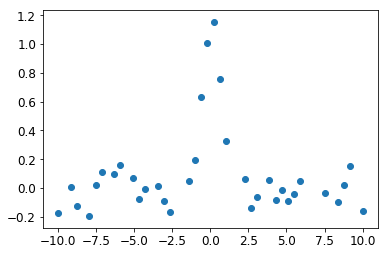

In [33]:
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train)

In [34]:
# number of hidden nodes
H =  100
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model4 = models.Sequential()
# layer 0
model4.add(layers.Dense(H, input_dim=input_dim,  
                activation='tanh')) 
# layer 1
model4.add(layers.Dense(H,
                activation='tanh')) 
# layer 2
model4.add(layers.Dense(H,
                activation='tanh')) 
# layer 3
model4.add(layers.Dense(H,  
                activation='tanh')) 
# layer 4
model4.add(layers.Dense(H,  
                activation='tanh')) 
# layer 5
model4.add(layers.Dense(H,  
                activation='tanh')) 
# layer 6
model4.add(layers.Dense(H,  
                activation='tanh'))
# layer 7
model4.add(layers.Dense(H,  
                activation='tanh'))
# layer 8
model4.add(layers.Dense(H,  
                activation='tanh'))
# layer 9
model4.add(layers.Dense(H,  
                activation='tanh'))
# layer 10 - output
model4.add(layers.Dense(1, 
                activation='linear')) 

In [35]:
# configure the model
model4.compile(loss='mean_squared_error', optimizer='adam')

In [36]:
# fit the model - INTENSIVE
model4_history = model4.fit(X_train, Y_train, batch_size=256, epochs=1500, verbose=1, \
                            shuffle = True, validation_split=0.2)

Train on 28 samples, validate on 7 samples
Epoch 1/1500
28/28 [==============================] - 1s 33ms/step - loss: 0.0982 - val_loss: 0.8771
Epoch 2/1500
28/28 [==============================] - 0s 228us/step - loss: 1.2231 - val_loss: 0.1202
Epoch 3/1500
28/28 [==============================] - 0s 155us/step - loss: 0.1317 - val_loss: 0.5882
Epoch 4/1500
28/28 [==============================] - 0s 156us/step - loss: 0.3733 - val_loss: 0.5810
Epoch 5/1500
28/28 [==============================] - 0s 141us/step - loss: 0.3616 - val_loss: 0.2368
Epoch 6/1500
28/28 [==============================] - 0s 153us/step - loss: 0.1102 - val_loss: 0.1185
Epoch 7/1500
28/28 [==============================] - 0s 142us/step - loss: 0.1478 - val_loss: 0.1656
Epoch 8/1500
28/28 [==============================] - 0s 161us/step - loss: 0.2651 - val_loss: 0.1287
Epoch 9/1500
28/28 [==============================] - 0s 168us/step - loss: 0.1852 - val_loss: 0.1172
Epoch 10/1500
28/28 [===================

Epoch 81/1500
28/28 [==============================] - 0s 173us/step - loss: 0.0078 - val_loss: 0.0165
Epoch 82/1500
28/28 [==============================] - 0s 164us/step - loss: 0.0078 - val_loss: 0.0159
Epoch 83/1500
28/28 [==============================] - 0s 173us/step - loss: 0.0077 - val_loss: 0.0151
Epoch 84/1500
28/28 [==============================] - 0s 179us/step - loss: 0.0077 - val_loss: 0.0146
Epoch 85/1500
28/28 [==============================] - 0s 195us/step - loss: 0.0077 - val_loss: 0.0149
Epoch 86/1500
28/28 [==============================] - 0s 209us/step - loss: 0.0077 - val_loss: 0.0156
Epoch 87/1500
28/28 [==============================] - 0s 280us/step - loss: 0.0076 - val_loss: 0.0162
Epoch 88/1500
28/28 [==============================] - 0s 175us/step - loss: 0.0076 - val_loss: 0.0161
Epoch 89/1500
28/28 [==============================] - 0s 184us/step - loss: 0.0076 - val_loss: 0.0153
Epoch 90/1500
28/28 [==============================] - 0s 145us/step - lo

Epoch 160/1500
28/28 [==============================] - 0s 124us/step - loss: 0.0072 - val_loss: 0.0155
Epoch 161/1500
28/28 [==============================] - 0s 151us/step - loss: 0.0072 - val_loss: 0.0154
Epoch 162/1500
28/28 [==============================] - 0s 166us/step - loss: 0.0072 - val_loss: 0.0154
Epoch 163/1500
28/28 [==============================] - 0s 138us/step - loss: 0.0072 - val_loss: 0.0153
Epoch 164/1500
28/28 [==============================] - 0s 128us/step - loss: 0.0072 - val_loss: 0.0153
Epoch 165/1500
28/28 [==============================] - 0s 129us/step - loss: 0.0072 - val_loss: 0.0153
Epoch 166/1500
28/28 [==============================] - 0s 146us/step - loss: 0.0072 - val_loss: 0.0153
Epoch 167/1500
28/28 [==============================] - 0s 135us/step - loss: 0.0072 - val_loss: 0.0153
Epoch 168/1500
28/28 [==============================] - 0s 137us/step - loss: 0.0072 - val_loss: 0.0152
Epoch 169/1500
28/28 [==============================] - 0s 185us

Epoch 239/1500
28/28 [==============================] - 0s 160us/step - loss: 0.0069 - val_loss: 0.0141
Epoch 240/1500
28/28 [==============================] - 0s 148us/step - loss: 0.0069 - val_loss: 0.0140
Epoch 241/1500
28/28 [==============================] - 0s 141us/step - loss: 0.0069 - val_loss: 0.0140
Epoch 242/1500
28/28 [==============================] - 0s 150us/step - loss: 0.0069 - val_loss: 0.0140
Epoch 243/1500
28/28 [==============================] - 0s 146us/step - loss: 0.0069 - val_loss: 0.0140
Epoch 244/1500
28/28 [==============================] - 0s 146us/step - loss: 0.0069 - val_loss: 0.0140
Epoch 245/1500
28/28 [==============================] - 0s 160us/step - loss: 0.0069 - val_loss: 0.0140
Epoch 246/1500
28/28 [==============================] - 0s 149us/step - loss: 0.0069 - val_loss: 0.0140
Epoch 247/1500
28/28 [==============================] - 0s 144us/step - loss: 0.0069 - val_loss: 0.0140
Epoch 248/1500
28/28 [==============================] - 0s 148us

Epoch 318/1500
28/28 [==============================] - 0s 160us/step - loss: 0.0065 - val_loss: 0.0132
Epoch 319/1500
28/28 [==============================] - 0s 156us/step - loss: 0.0065 - val_loss: 0.0132
Epoch 320/1500
28/28 [==============================] - 0s 145us/step - loss: 0.0065 - val_loss: 0.0131
Epoch 321/1500
28/28 [==============================] - 0s 139us/step - loss: 0.0065 - val_loss: 0.0131
Epoch 322/1500
28/28 [==============================] - 0s 154us/step - loss: 0.0065 - val_loss: 0.0131
Epoch 323/1500
28/28 [==============================] - 0s 149us/step - loss: 0.0065 - val_loss: 0.0131
Epoch 324/1500
28/28 [==============================] - 0s 178us/step - loss: 0.0065 - val_loss: 0.0131
Epoch 325/1500
28/28 [==============================] - 0s 183us/step - loss: 0.0065 - val_loss: 0.0131
Epoch 326/1500
28/28 [==============================] - 0s 211us/step - loss: 0.0065 - val_loss: 0.0131
Epoch 327/1500
28/28 [==============================] - 0s 152us

Epoch 397/1500
28/28 [==============================] - 0s 177us/step - loss: 0.0058 - val_loss: 0.0123
Epoch 398/1500
28/28 [==============================] - 0s 155us/step - loss: 0.0058 - val_loss: 0.0123
Epoch 399/1500
28/28 [==============================] - 0s 165us/step - loss: 0.0058 - val_loss: 0.0123
Epoch 400/1500
28/28 [==============================] - 0s 190us/step - loss: 0.0058 - val_loss: 0.0122
Epoch 401/1500
28/28 [==============================] - 0s 154us/step - loss: 0.0057 - val_loss: 0.0122
Epoch 402/1500
28/28 [==============================] - 0s 160us/step - loss: 0.0057 - val_loss: 0.0122
Epoch 403/1500
28/28 [==============================] - 0s 189us/step - loss: 0.0057 - val_loss: 0.0122
Epoch 404/1500
28/28 [==============================] - 0s 157us/step - loss: 0.0057 - val_loss: 0.0122
Epoch 405/1500
28/28 [==============================] - 0s 150us/step - loss: 0.0057 - val_loss: 0.0122
Epoch 406/1500
28/28 [==============================] - 0s 189us

Epoch 476/1500
28/28 [==============================] - 0s 141us/step - loss: 0.0076 - val_loss: 0.0122
Epoch 477/1500
28/28 [==============================] - 0s 149us/step - loss: 0.0058 - val_loss: 0.0041
Epoch 478/1500
28/28 [==============================] - 0s 132us/step - loss: 0.0082 - val_loss: 0.0115
Epoch 479/1500
28/28 [==============================] - 0s 149us/step - loss: 0.0057 - val_loss: 0.0171
Epoch 480/1500
28/28 [==============================] - 0s 125us/step - loss: 0.0070 - val_loss: 0.0072
Epoch 481/1500
28/28 [==============================] - 0s 142us/step - loss: 0.0064 - val_loss: 0.0074
Epoch 482/1500
28/28 [==============================] - 0s 204us/step - loss: 0.0061 - val_loss: 0.0154
Epoch 483/1500
28/28 [==============================] - 0s 158us/step - loss: 0.0067 - val_loss: 0.0109
Epoch 484/1500
28/28 [==============================] - 0s 156us/step - loss: 0.0057 - val_loss: 0.0059
Epoch 485/1500
28/28 [==============================] - 0s 186us

Epoch 555/1500
28/28 [==============================] - 0s 218us/step - loss: 0.0052 - val_loss: 0.0105
Epoch 556/1500
28/28 [==============================] - 0s 185us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 557/1500
28/28 [==============================] - 0s 152us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 558/1500
28/28 [==============================] - 0s 210us/step - loss: 0.0052 - val_loss: 0.0104
Epoch 559/1500
28/28 [==============================] - 0s 194us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 560/1500
28/28 [==============================] - 0s 195us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 561/1500
28/28 [==============================] - 0s 156us/step - loss: 0.0052 - val_loss: 0.0104
Epoch 562/1500
28/28 [==============================] - 0s 164us/step - loss: 0.0052 - val_loss: 0.0105
Epoch 563/1500
28/28 [==============================] - 0s 153us/step - loss: 0.0052 - val_loss: 0.0105
Epoch 564/1500
28/28 [==============================] - 0s 146us

Epoch 634/1500
28/28 [==============================] - 0s 165us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 635/1500
28/28 [==============================] - 0s 173us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 636/1500
28/28 [==============================] - 0s 175us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 637/1500
28/28 [==============================] - 0s 153us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 638/1500
28/28 [==============================] - 0s 157us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 639/1500
28/28 [==============================] - 0s 170us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 640/1500
28/28 [==============================] - 0s 149us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 641/1500
28/28 [==============================] - 0s 176us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 642/1500
28/28 [==============================] - 0s 174us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 643/1500
28/28 [==============================] - 0s 152us

Epoch 713/1500
28/28 [==============================] - 0s 150us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 714/1500
28/28 [==============================] - 0s 187us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 715/1500
28/28 [==============================] - 0s 220us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 716/1500
28/28 [==============================] - 0s 215us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 717/1500
28/28 [==============================] - 0s 156us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 718/1500
28/28 [==============================] - 0s 238us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 719/1500
28/28 [==============================] - 0s 152us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 720/1500
28/28 [==============================] - 0s 181us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 721/1500
28/28 [==============================] - 0s 215us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 722/1500
28/28 [==============================] - 0s 170us

Epoch 792/1500
28/28 [==============================] - 0s 127us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 793/1500
28/28 [==============================] - 0s 149us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 794/1500
28/28 [==============================] - 0s 158us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 795/1500
28/28 [==============================] - 0s 149us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 796/1500
28/28 [==============================] - 0s 137us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 797/1500
28/28 [==============================] - 0s 157us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 798/1500
28/28 [==============================] - 0s 163us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 799/1500
28/28 [==============================] - 0s 146us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 800/1500
28/28 [==============================] - 0s 170us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 801/1500
28/28 [==============================] - 0s 152us

Epoch 871/1500
28/28 [==============================] - 0s 162us/step - loss: 0.0053 - val_loss: 0.0133
Epoch 872/1500
28/28 [==============================] - 0s 188us/step - loss: 0.0056 - val_loss: 0.0082
Epoch 873/1500
28/28 [==============================] - 0s 207us/step - loss: 0.0054 - val_loss: 0.0105
Epoch 874/1500
28/28 [==============================] - 0s 205us/step - loss: 0.0052 - val_loss: 0.0128
Epoch 875/1500
28/28 [==============================] - 0s 166us/step - loss: 0.0054 - val_loss: 0.0084
Epoch 876/1500
28/28 [==============================] - 0s 215us/step - loss: 0.0054 - val_loss: 0.0117
Epoch 877/1500
28/28 [==============================] - 0s 206us/step - loss: 0.0052 - val_loss: 0.0120
Epoch 878/1500
28/28 [==============================] - 0s 215us/step - loss: 0.0052 - val_loss: 0.0091
Epoch 879/1500
28/28 [==============================] - 0s 178us/step - loss: 0.0053 - val_loss: 0.0126
Epoch 880/1500
28/28 [==============================] - 0s 155us

Epoch 950/1500
28/28 [==============================] - 0s 145us/step - loss: 0.0051 - val_loss: 0.0103
Epoch 951/1500
28/28 [==============================] - 0s 173us/step - loss: 0.0051 - val_loss: 0.0104
Epoch 952/1500
28/28 [==============================] - 0s 167us/step - loss: 0.0051 - val_loss: 0.0103
Epoch 953/1500
28/28 [==============================] - 0s 174us/step - loss: 0.0051 - val_loss: 0.0104
Epoch 954/1500
28/28 [==============================] - 0s 160us/step - loss: 0.0051 - val_loss: 0.0103
Epoch 955/1500
28/28 [==============================] - 0s 161us/step - loss: 0.0051 - val_loss: 0.0104
Epoch 956/1500
28/28 [==============================] - 0s 152us/step - loss: 0.0051 - val_loss: 0.0103
Epoch 957/1500
28/28 [==============================] - 0s 161us/step - loss: 0.0051 - val_loss: 0.0103
Epoch 958/1500
28/28 [==============================] - 0s 163us/step - loss: 0.0050 - val_loss: 0.0104
Epoch 959/1500
28/28 [==============================] - 0s 147us

Epoch 1029/1500
28/28 [==============================] - 0s 261us/step - loss: 0.0050 - val_loss: 0.0099
Epoch 1030/1500
28/28 [==============================] - 0s 182us/step - loss: 0.0050 - val_loss: 0.0108
Epoch 1031/1500
28/28 [==============================] - 0s 195us/step - loss: 0.0051 - val_loss: 0.0096
Epoch 1032/1500
28/28 [==============================] - 0s 188us/step - loss: 0.0051 - val_loss: 0.0113
Epoch 1033/1500
28/28 [==============================] - 0s 203us/step - loss: 0.0053 - val_loss: 0.0092
Epoch 1034/1500
28/28 [==============================] - 0s 226us/step - loss: 0.0055 - val_loss: 0.0123
Epoch 1035/1500
28/28 [==============================] - 0s 173us/step - loss: 0.0059 - val_loss: 0.0084
Epoch 1036/1500
28/28 [==============================] - 0s 188us/step - loss: 0.0064 - val_loss: 0.0139
Epoch 1037/1500
28/28 [==============================] - 0s 201us/step - loss: 0.0069 - val_loss: 0.0073
Epoch 1038/1500
28/28 [==============================] 

28/28 [==============================] - 0s 144us/step - loss: 0.0049 - val_loss: 0.0104
Epoch 1108/1500
28/28 [==============================] - 0s 154us/step - loss: 0.0049 - val_loss: 0.0105
Epoch 1109/1500
28/28 [==============================] - 0s 120us/step - loss: 0.0049 - val_loss: 0.0103
Epoch 1110/1500
28/28 [==============================] - 0s 140us/step - loss: 0.0049 - val_loss: 0.0106
Epoch 1111/1500
28/28 [==============================] - 0s 140us/step - loss: 0.0049 - val_loss: 0.0102
Epoch 1112/1500
28/28 [==============================] - 0s 123us/step - loss: 0.0049 - val_loss: 0.0107
Epoch 1113/1500
28/28 [==============================] - 0s 129us/step - loss: 0.0049 - val_loss: 0.0101
Epoch 1114/1500
28/28 [==============================] - 0s 136us/step - loss: 0.0049 - val_loss: 0.0107
Epoch 1115/1500
28/28 [==============================] - 0s 159us/step - loss: 0.0049 - val_loss: 0.0100
Epoch 1116/1500
28/28 [==============================] - 0s 130us/step 

Epoch 1186/1500
28/28 [==============================] - 0s 164us/step - loss: 0.0048 - val_loss: 0.0108
Epoch 1187/1500
28/28 [==============================] - 0s 180us/step - loss: 0.0048 - val_loss: 0.0107
Epoch 1188/1500
28/28 [==============================] - 0s 155us/step - loss: 0.0048 - val_loss: 0.0105
Epoch 1189/1500
28/28 [==============================] - 0s 152us/step - loss: 0.0048 - val_loss: 0.0109
Epoch 1190/1500
28/28 [==============================] - 0s 167us/step - loss: 0.0048 - val_loss: 0.0104
Epoch 1191/1500
28/28 [==============================] - 0s 154us/step - loss: 0.0048 - val_loss: 0.0110
Epoch 1192/1500
28/28 [==============================] - 0s 168us/step - loss: 0.0048 - val_loss: 0.0105
Epoch 1193/1500
28/28 [==============================] - 0s 160us/step - loss: 0.0048 - val_loss: 0.0109
Epoch 1194/1500
28/28 [==============================] - 0s 148us/step - loss: 0.0048 - val_loss: 0.0107
Epoch 1195/1500
28/28 [==============================] 

28/28 [==============================] - 0s 157us/step - loss: 0.0049 - val_loss: 0.0119
Epoch 1265/1500
28/28 [==============================] - 0s 156us/step - loss: 0.0047 - val_loss: 0.0125
Epoch 1266/1500
28/28 [==============================] - 0s 165us/step - loss: 0.0048 - val_loss: 0.0096
Epoch 1267/1500
28/28 [==============================] - 0s 169us/step - loss: 0.0047 - val_loss: 0.0116
Epoch 1268/1500
28/28 [==============================] - 0s 170us/step - loss: 0.0046 - val_loss: 0.0124
Epoch 1269/1500
28/28 [==============================] - 0s 156us/step - loss: 0.0048 - val_loss: 0.0107
Epoch 1270/1500
28/28 [==============================] - 0s 152us/step - loss: 0.0046 - val_loss: 0.0107
Epoch 1271/1500
28/28 [==============================] - 0s 167us/step - loss: 0.0046 - val_loss: 0.0123
Epoch 1272/1500
28/28 [==============================] - 0s 153us/step - loss: 0.0047 - val_loss: 0.0116
Epoch 1273/1500
28/28 [==============================] - 0s 153us/step 

Epoch 1343/1500
28/28 [==============================] - 0s 150us/step - loss: 0.0038 - val_loss: 0.0132
Epoch 1344/1500
28/28 [==============================] - 0s 163us/step - loss: 0.0038 - val_loss: 0.0132
Epoch 1345/1500
28/28 [==============================] - 0s 157us/step - loss: 0.0037 - val_loss: 0.0132
Epoch 1346/1500
28/28 [==============================] - 0s 164us/step - loss: 0.0037 - val_loss: 0.0133
Epoch 1347/1500
28/28 [==============================] - 0s 137us/step - loss: 0.0037 - val_loss: 0.0133
Epoch 1348/1500
28/28 [==============================] - 0s 153us/step - loss: 0.0037 - val_loss: 0.0133
Epoch 1349/1500
28/28 [==============================] - 0s 179us/step - loss: 0.0037 - val_loss: 0.0134
Epoch 1350/1500
28/28 [==============================] - 0s 206us/step - loss: 0.0037 - val_loss: 0.0134
Epoch 1351/1500
28/28 [==============================] - 0s 157us/step - loss: 0.0037 - val_loss: 0.0134
Epoch 1352/1500
28/28 [==============================] 

28/28 [==============================] - 0s 247us/step - loss: 0.0031 - val_loss: 0.0171
Epoch 1422/1500
28/28 [==============================] - 0s 244us/step - loss: 0.0032 - val_loss: 0.0162
Epoch 1423/1500
28/28 [==============================] - 0s 219us/step - loss: 0.0032 - val_loss: 0.0185
Epoch 1424/1500
28/28 [==============================] - 0s 255us/step - loss: 0.0033 - val_loss: 0.0143
Epoch 1425/1500
28/28 [==============================] - 0s 224us/step - loss: 0.0034 - val_loss: 0.0196
Epoch 1426/1500
28/28 [==============================] - 0s 199us/step - loss: 0.0034 - val_loss: 0.0152
Epoch 1427/1500
28/28 [==============================] - 0s 196us/step - loss: 0.0034 - val_loss: 0.0184
Epoch 1428/1500
28/28 [==============================] - 0s 249us/step - loss: 0.0033 - val_loss: 0.0163
Epoch 1429/1500
28/28 [==============================] - 0s 192us/step - loss: 0.0032 - val_loss: 0.0181
Epoch 1430/1500
28/28 [==============================] - 0s 216us/step 

Epoch 1500/1500
28/28 [==============================] - 0s 129us/step - loss: 0.0025 - val_loss: 0.0196


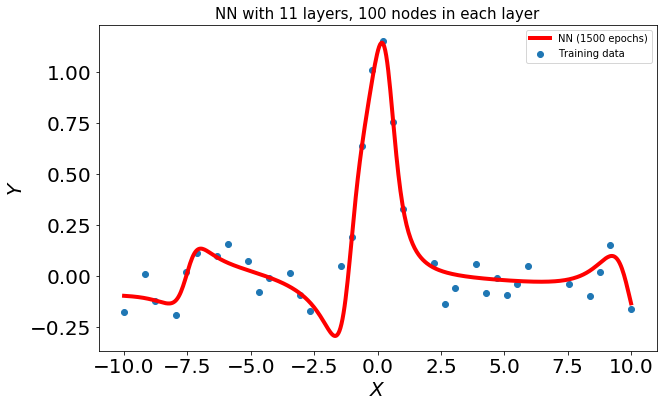

In [38]:
# use our model to predict in the range we want
num_epochs = f'{len(model4_history.epoch)}'

X_range = np.linspace(-10, 10, 500)
y_pred = model4.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN ({num_epochs} epochs)')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title(f'NN with {len(model4_history.model.layers)} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=20)

ax.legend(loc=0)
plt.show()

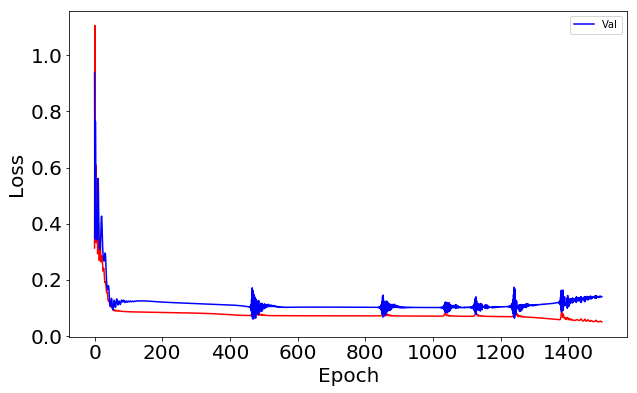

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model4_history.history['loss']), 'r')
ax.plot(np.sqrt(model4_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Regularization

Let's try adding a regularizer in our model: `kernel_regularizer=regularizers.l2(l2)`. Also let's create a function that takes the number of layers and the l2 value as the input and creates the model.

Usage: `def create_dense([10, 20], l2=0.01)` will create a model with two hidden layers of 10 and 20 nodes each, l2=0.01 regularization and num_classes output nodes. 

In [40]:
from keras import regularizers

Using TensorFlow backend.


In [41]:
H =  100  # number of hidden nodes
input_dim = 1

model5 = models.Sequential()

# Input layer of the neural network with ReLU activation function and L2 regularization
model5.add(layers.Dense(H, input_dim=input_dim,  
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
           
# hidden layers
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
# output layer
model5.add(layers.Dense(1, 
                activation='linear')) 

In [ ]:
# configure the model
model5.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# fit the model - INTENSIVE
model5_history = model5.fit(X_train, Y_train, batch_size=256, epochs=1500, verbose=1, \
                            shuffle = True, validation_split=0.2)

In [ ]:
# use our model to predict in the range we want
num_epochs = f'{len(model5_history.epoch)}'

X_range = np.linspace(-10, 10, 500)
y_pred = model5.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN ({num_epochs} epochs)')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title(f'NN with {len(model5_history.model.layers)} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=20)

ax.legend(loc=0)
plt.show()

That seems very good. Let's see the $R^2$

In [ ]:
from sklearn.metrics import r2_score as r2

In [ ]:
score = model5.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score)
print('Test R2:', r2(Y_test, model5.predict(X_test)))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model5_history.history['loss']), 'r')
ax.plot(np.sqrt(model5_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)